<a href="https://colab.research.google.com/github/imabari/covid19-data/blob/master/toyama/toyama_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

富山県のデータで作成

※わかりやすいようにグラフ表示していますが値の場合は「.plot.bar()」を削除

In [1]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 4.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=0f3722bc157fd7f0b358d037e74154fd11889fbe79630037cd1b66531a96dad1
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [2]:
!pip install -U pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


# 設定

In [0]:
COUNTS_FILE = "toyama_counts.csv"
PATIENTS_FILE = "toyama_patients.csv"

# ダウンロード

In [6]:
!wget "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=0&single=true&output=csv" -O $PATIENTS_FILE
!wget "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=574469870&single=true&output=csv" -O $COUNTS_FILE

--2020-04-28 02:34:47--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=0&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘toyama_patients.csv’

toyama_patients.csv     [ <=>                ]  14.98K  --.-KB/s    in 0s      

2020-04-28 02:34:47 (75.3 MB/s) - ‘toyama_patients.csv’ saved [15344]

--2020-04-28 02:34:48--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSJuQThafLPC7OPqUC9TbLV1DmSU0x2Co8VZi2Q2ZZCKLJCTayDl6IoXKyK676mzBgpkoKMgpNK1VML/pub?gid=574469870&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 173.194.202.138, 173.194.202.101, 173.194.202.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.138|:443... c

# 内容確認

## 日別データ

In [7]:
df_counts = pd.read_csv(COUNTS_FILE, index_col="年月日", parse_dates=True, dtype={"備考": "object"})

df_counts.head(10)

,検査実施人数,陰性人数,陽性人数,一般相談件数,帰国者相談件数,退院者数,死亡者数,備考
年月日,,,,,,,,
2020-02-27,24.0,24.0,0,1614.0,96.0,0,0,当日以前の分も含めて累計で表示
2020-02-28,0.0,0.0,0,144.0,8.0,0,0,NaN
2020-02-29,0.0,0.0,0,43.0,4.0,0,0,NaN
2020-03-01,1.0,1.0,0,29.0,4.0,0,0,NaN
2020-03-02,1.0,1.0,0,165.0,6.0,0,0,NaN
2020-03-03,2.0,2.0,0,129.0,8.0,0,0,NaN
2020-03-04,3.0,3.0,0,113.0,10.0,0,0,NaN
2020-03-05,3.0,3.0,0,90.0,6.0,0,0,NaN
2020-03-06,4.0,4.0,0,102.0,9.0,0,0,NaN


## 患者データ

In [8]:
df_kanja = pd.read_csv(PATIENTS_FILE, index_col="No", dtype={"発症日": "object", "年代": "object", "備考": "object"})

df_kanja.head(10)

,市番号,検査結果判明日,年代,性別,居住地,職業,市区町村名,発症日,状態,症状,渡航歴の有無,備考
No,,,,,,,,,,,,
1,感染者1,2020-03-30,20代,女,富山市,卒業生,富山市,NaN,入院中,軽症・中等症,x,NaN
2,A,2020-03-31,20代,女,南砺市,看護師,NaN,NaN,入院中,軽症・中等症,x,NaN
3,感染者2,2020-03-31,20代,女,富山市,保育士,富山市,NaN,入院中,無症状,x,NaN
4,感染者3,2020-03-31,20代,女,富山市,就職予定者,富山市,NaN,入院中,軽症・中等症,x,NaN
5,‐,2020-04-01,20代,男,射水市,新規採用教員,NaN,NaN,入院中,軽症・中等症,x,NaN
6,感染者4,2020-04-01,50代,女,富山市,介護施設職員,富山市,NaN,入院中,軽症・中等症,x,NaN
7,感染者5,2020-04-01,20代,男,富山市,会社員,富山市,NaN,入院中,無症状,x,NaN
8,-,2020-04-02,50代,女,射水市,国家公務員,NaN,NaN,入院中,軽症・中等症,x,NaN
9,感染者6,2020-04-04,20代,女,富山市,飲食店店員,富山市,NaN,入院中,軽症・中等症,x,NaN


# 一般

## 検査実施状況

In [9]:
df_counts.tail(1)

,検査実施人数,陰性人数,陽性人数,一般相談件数,帰国者相談件数,退院者数,死亡者数,備考
年月日,,,,,,,,
2020-04-27,NaN,NaN,1,NaN,NaN,3,0,NaN


## 陽性患者数

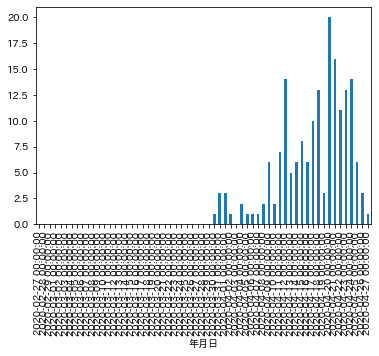

In [10]:
#日別
df_counts["陽性人数"].plot.bar()

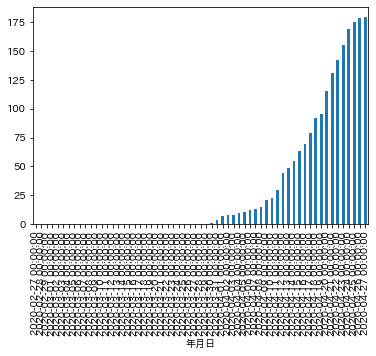

In [11]:
# 累計
df_counts["陽性人数"].cumsum().plot.bar()

## 検査実施人数

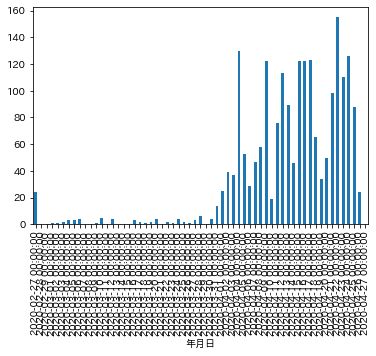

In [12]:
# 日別
df_counts["検査実施人数"].plot.bar()

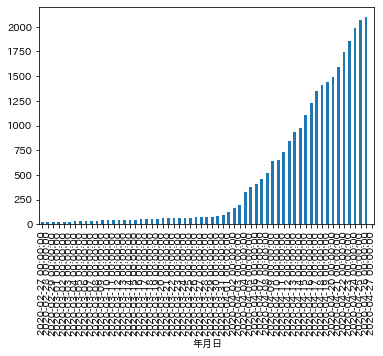

In [13]:
# 累計
df_counts["検査実施人数"].cumsum().plot.bar()

## 相談件数

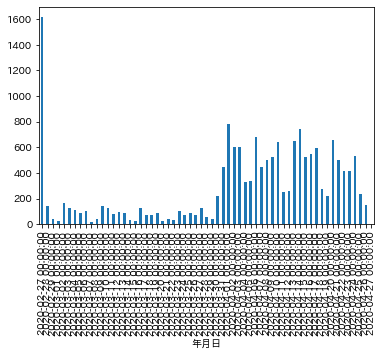

In [14]:
# 日別
df_counts["一般相談件数"].plot.bar()

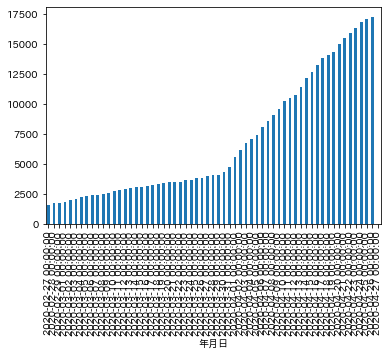

In [15]:
# 累計
df_counts["一般相談件数"].cumsum().plot.bar()

# その他

## 現在患者数

現在患者数とは、陽性人数から退院者数と死亡者数を除いた人数です。

In [0]:
df_counts["現在患者数"] = df_counts["陽性人数"] - df_counts["退院者数"] - df_counts["死亡者数"]

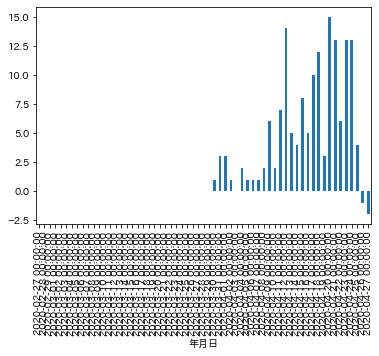

In [17]:
# 日別
df_counts["現在患者数"].plot.bar()

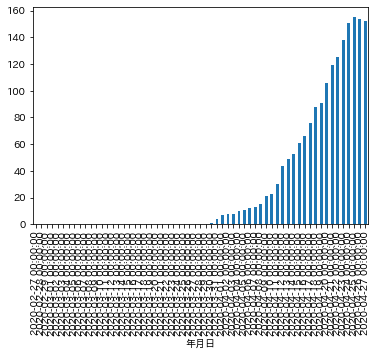

In [18]:
# 累計
df_counts["現在患者数"].cumsum().plot.bar()

## 治療修了者数

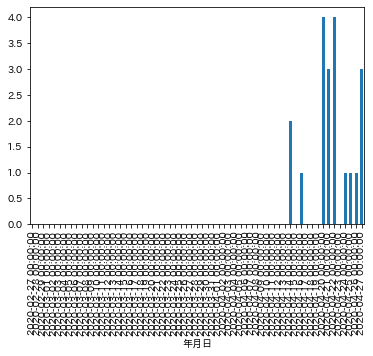

In [19]:
# 日別
df_counts["退院者数"].plot.bar()

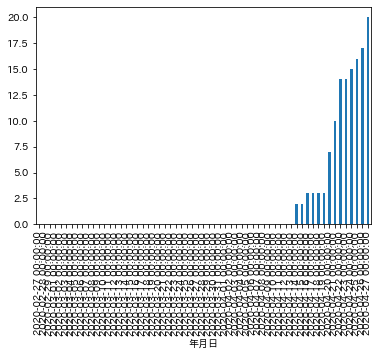

In [20]:
# 累計
df_counts["退院者数"].cumsum().plot.bar()

## 年代別

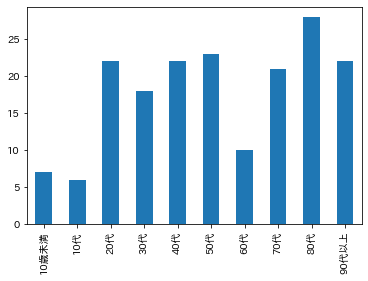

In [21]:
age_lists = ["10歳未満", "10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代", "90代以上"]
df_kanja["年代"].value_counts().reindex(age_lists).plot.bar()

## 年代・男女別

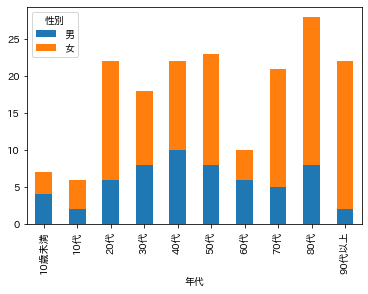

In [22]:
pd.crosstab(df_kanja["年代"], df_kanja["性別"]).reindex(index=age_lists, columns=["男", "女"]).plot.bar(stacked=True)

## 男女別

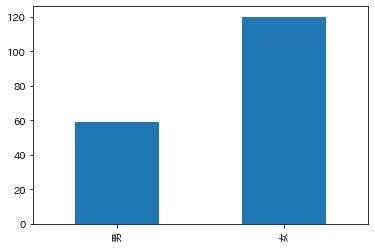

In [23]:
df_kanja["性別"].value_counts().reindex(["男", "女"]).plot.bar()

## 男女・年代別

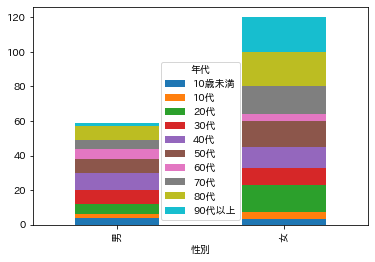

In [24]:
pd.crosstab(df_kanja["性別"], df_kanja["年代"]).reindex(index=["男", "女"], columns=age_lists).plot.bar(stacked=True)

## 居住地別

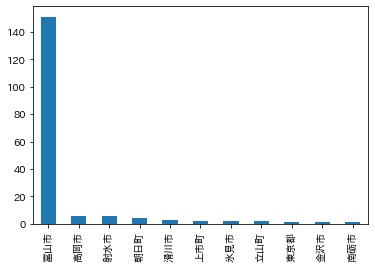

In [25]:
df_kanja["居住地"].value_counts().plot.bar()

## 陽性率

In [0]:
df_positive = df_counts.loc[:, ["検査実施人数", "陽性人数"]].copy()

In [31]:
df_positive

,検査実施人数,陽性人数
年月日,,
2020-02-27,24.0,0
2020-02-28,0.0,0
2020-02-29,0.0,0
2020-03-01,1.0,0
2020-03-02,1.0,0
...,...,...
2020-04-23,110.0,13
2020-04-24,126.0,14
2020-04-25,88.0,6


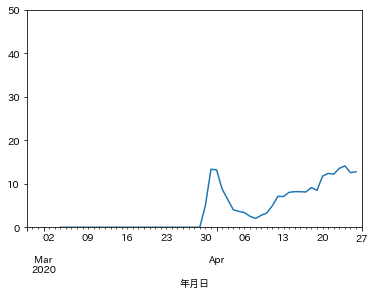

In [27]:
# 7日間平均
df_positive_2w = df_positive.rolling(window=7).mean()
df_positive_2w["陽性率"] = df_positive_2w["陽性人数"] / df_positive_2w["検査実施人数"] * 100
df_positive_2w["陽性率"].plot(ylim=(0, 50))

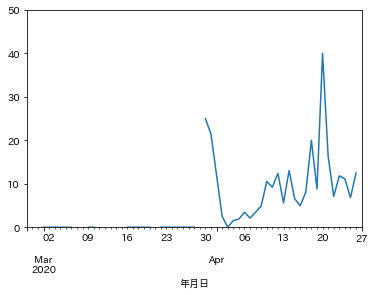

In [28]:
# 補正なし
df_positive["陽性率"] = df_positive["陽性人数"] / df_positive["検査実施人数"] * 100
df_positive["陽性率"].plot(ylim=(0, 50))